<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [3]:
# 데이터 읽어오기
path = 'https://bit.ly/ApartFile'
apart = pd.read_csv(path, encoding='CP949')


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [4]:
# 상위 5개 행 확인
apart.head()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [5]:
# 하위 5개 행 확인
apart.tail()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [9]:
# 열 정보 확인
print(apart.columns)
print(apart.info())

Index(['지역1', '지역2', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB
None


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [11]:
# 결측치 확인
print(apart.isnull().sum())

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64


## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [13]:
# 열 이름 변경
apart.rename(columns={'지역1':'시도', '지역2':'구군'}, inplace=True)

# 확인
apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [14]:
# 연간 증가액
apart['증가액'] = apart['2021-07'] - apart['2020-08']

# 연간 증가율
apart['증가율'] = apart['증가액'] * 100 / apart['2020-08']

# 확인
apart.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [15]:
# 분석 대상 열 지정
apart2 = apart[['시도','구군','증가액','증가율']]

# 확인
print(apart2)

     시도    구군    증가액        증가율
0    서울   종로구  21208   2.059945
1    서울    중구  27229   3.394050
2    서울   용산구  45719   3.267150
3    서울   성동구  36441   4.001357
4    서울   광진구  42768   4.188683
..   ..   ...    ...        ...
182  경남   밀양시   2670   2.111423
183  경남   거제시   5805   3.738552
184  경남   양산시  31641  18.334743
185  제주   제주시  40529  13.337568
186  제주  서귀포시   8370   3.751899

[187 rows x 4 columns]


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

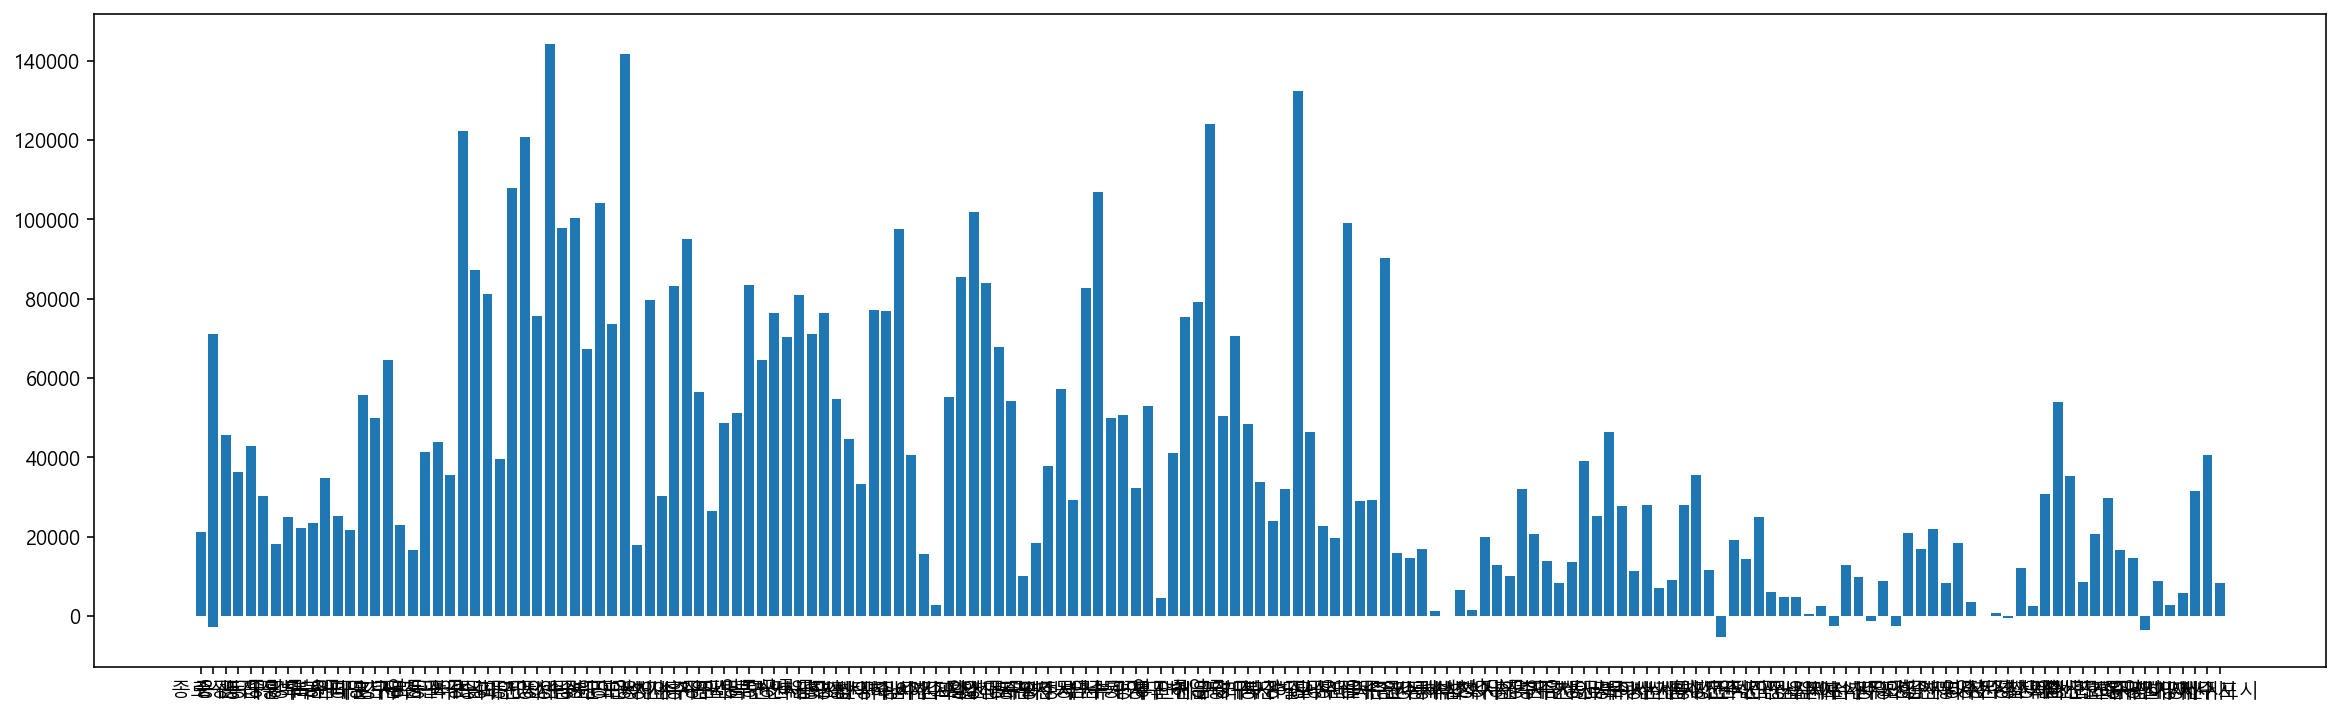

In [40]:
# 차트 그리기
plt.figure(figsize=(20,6))
plt.bar(apart2['구군'], apart2['증가액'])
plt.show()




**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [41]:
# 가격 변동 TOP 25
tmp = apart2.sort_values(by='증가액', ascending=False).head(25)

# 확인
print(tmp)

     시도    구군     증가액        증가율
28   경기   동안구  144265  25.019033
34   경기   의왕시  141787  28.618515
99   대구   수성구  132345  25.655664
86   부산  해운대구  123977  30.789194
21   서울   서초구  122376   6.988865
26   경기   안양시  120878  22.304477
25   경기   과천시  108063   8.575013
73   인천   연수구  107033  23.328647
32   경기   분당구  104115  11.234421
62   경기   덕양구  101934  26.441543
30   경기   수정구  100357  11.162002
110  대전   유성구   99153  23.851540
29   경기   성남시   97866  11.557457
56   경기   하남시   97673  14.141202
39   경기   수지구   95127  15.930595
117  세종   세종시   90169  19.796522
22   서울   강남구   87274   5.040291
61   경기   고양시   85520  22.930196
63   경기  일산동구   83863  19.850170
44   경기   영통구   83472  14.617668
38   경기   기흥구   83123  19.370121
83   부산    남구   82844  23.103159
23   서울   송파구   81143   6.435640
48   경기   단원구   81010  25.371442
36   경기   용인시   79811  17.230428


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

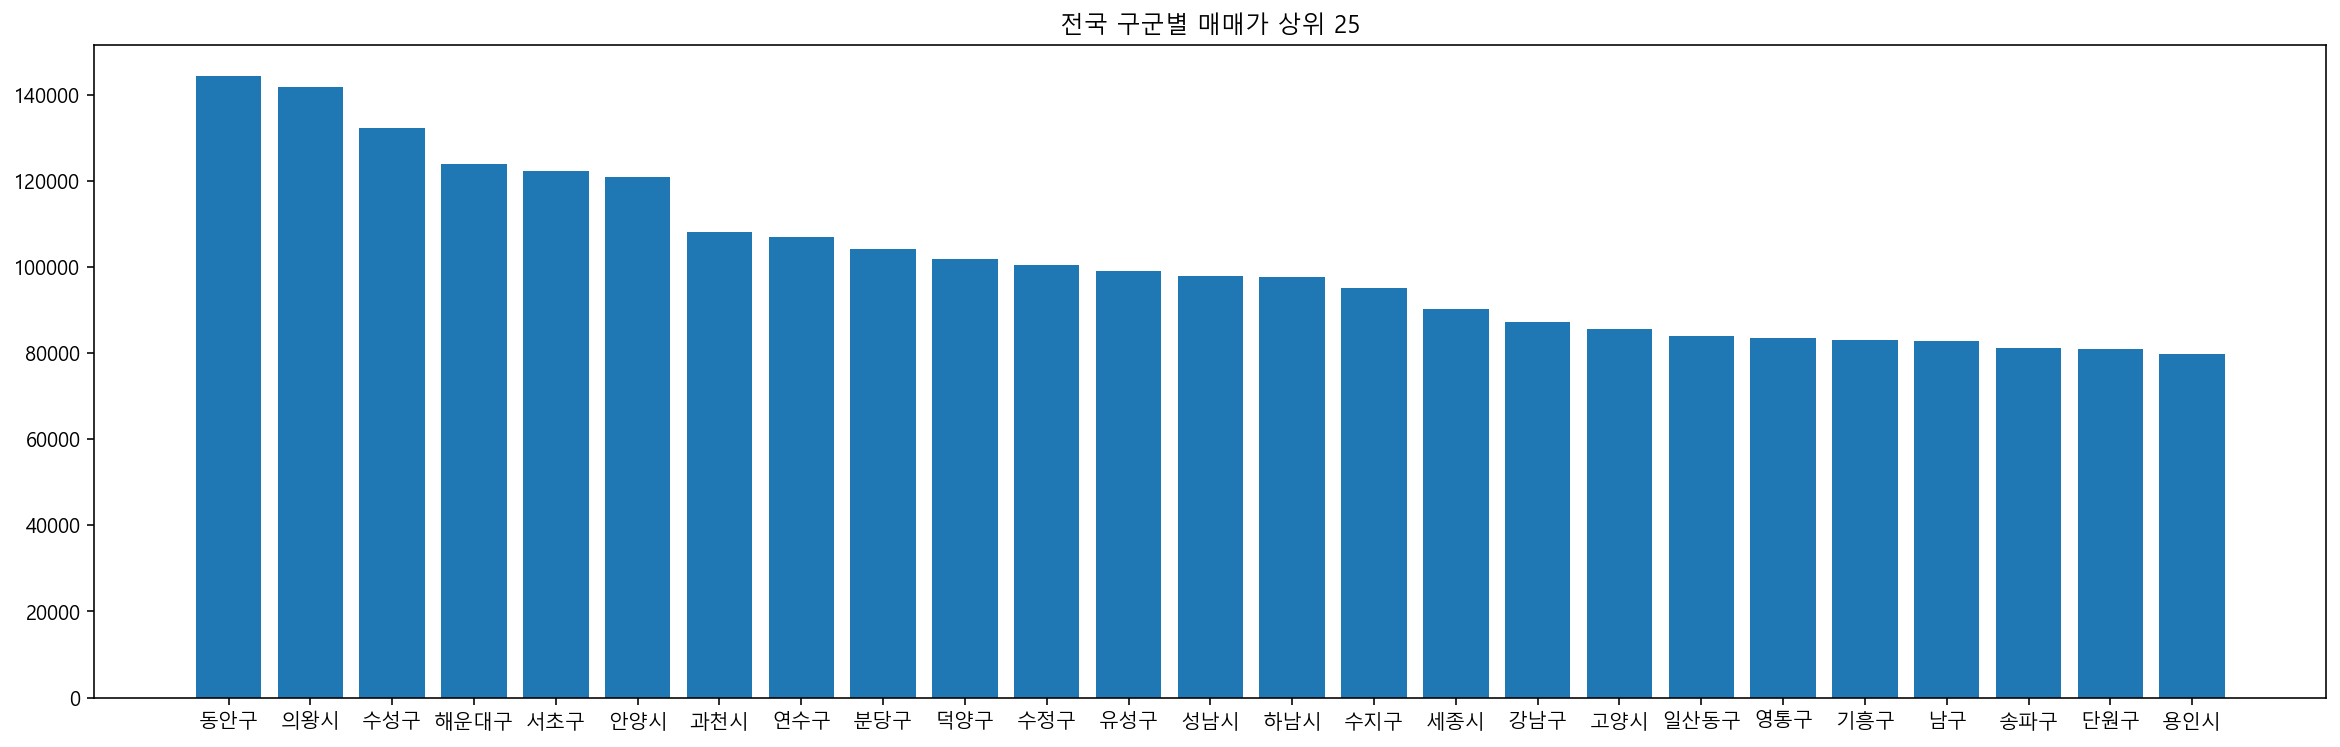

In [42]:
# 차트 그리기
plt.figure(figsize=(20,6))
plt.title('전국 구군별 매매가 상위 25')
plt.bar(tmp['구군'], tmp['증가액'])
plt.show()




**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [43]:
# 가격 변동 BOTTOM 25
tmp = apart2.sort_values(by='증가액', ascending=False).tail(25)

# 확인
print(tmp)

     시도   구군   증가액       증가율
139  충남  서산시  7133  4.849808
123  강원  속초시  6652  4.845465
148  전북  군산시  6152  5.388881
183  경남  거제시  5805  3.738552
149  전북  익산시  4821  3.353739
150  전북  정읍시  4740  4.440281
81   부산  영도구  4625  2.358286
166  경북  영주시  3444  2.937038
59   경기  여주시  2808  2.133333
182  경남  밀양시  2670  2.111423
171  경북  칠곡군  2620  2.517053
152  전북  김제시  2487  2.780697
124  강원  삼척시  1472  1.469546
121  강원  동해시  1334  1.250070
168  경북  상주시   677  0.501864
151  전북  남원시   486  0.345330
122  강원  태백시   -42 -0.053589
167  경북  영천시   -93 -0.091874
169  경북  문경시  -550 -0.389381
156  전남  나주시 -1188 -0.714629
153  전남  목포시 -2396 -1.624021
158  전남  무안군 -2588 -1.326411
78   부산   중구 -2645 -1.795253
180  경남  사천시 -3527 -2.785500
144  충남  당진시 -5264 -3.192857


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

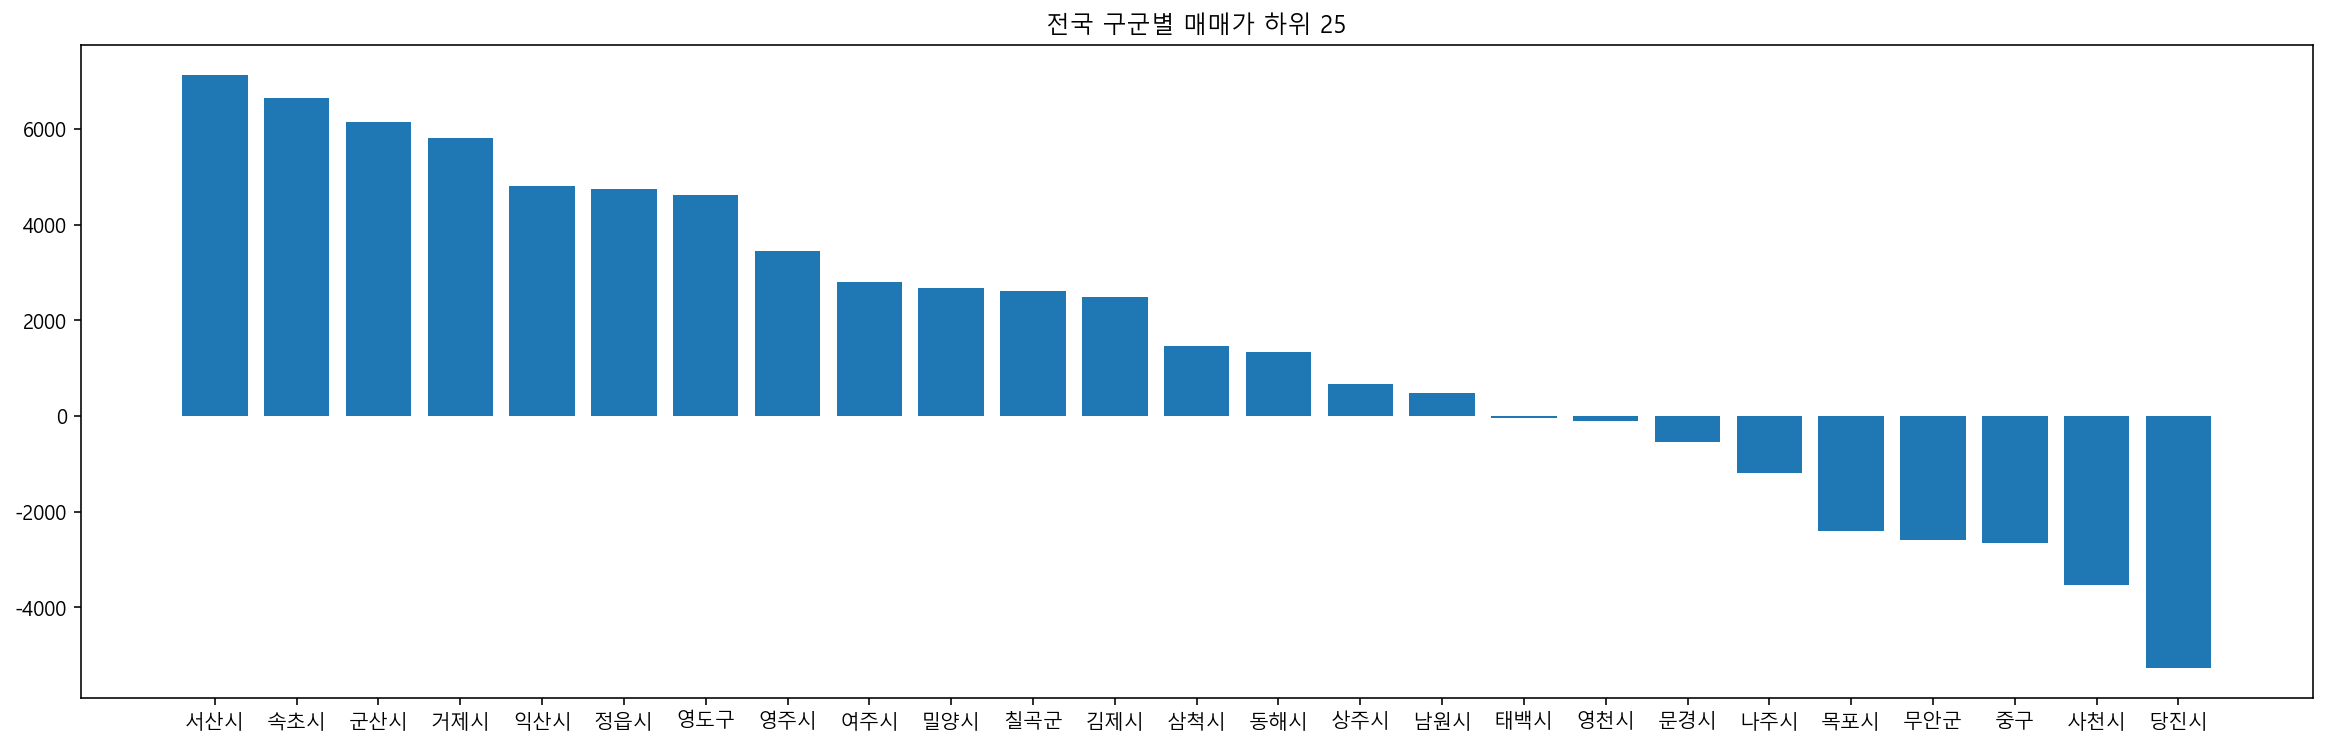

In [44]:
# 차트 그리기
plt.figure(figsize=(20,6))
plt.title('전국 구군별 매매가 하위 25')
plt.bar(tmp['구군'], tmp['증가액'])
plt.show()





### 4.2.ㅇㅇ 지역 분석

**1) ㅇㅇ 지역 데이터 추출**

- apart2 데이터프레임에서 ㅇㅇ지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [45]:
# 데이터프레임 만들기
apart3 = apart2.loc[apart2['시도'] == '서울']

# 확인
print(apart3)

    시도    구군     증가액       증가율
0   서울   종로구   21208  2.059945
1   서울    중구   27229  3.394050
2   서울   용산구   45719  3.267150
3   서울   성동구   36441  4.001357
4   서울   광진구   42768  4.188683
5   서울  동대문구   30217  4.539275
6   서울   중랑구   18255  3.984051
7   서울   성북구   25009  4.186356
8   서울   강북구   22278  4.380527
9   서울   도봉구   23500  5.434091
10  서울   노원구   34828  7.254534
11  서울   은평구   25224  4.133144
12  서울  서대문구   21630  3.322468
13  서울   마포구   55788  5.584597
14  서울   양천구   49836  5.632141
15  서울   강서구   25659  4.114017
16  서울   구로구   22991  4.033388
17  서울   금천구   16641  3.188401
18  서울  영등포구   41415  5.079850
19  서울   동작구   43885  5.195680
20  서울   관악구   35652  6.814272
21  서울   서초구  122376  6.988865
22  서울   강남구   87274  5.040291
23  서울   송파구   81143  6.435640
24  서울   강동구   39687  4.984871


**2) ㅇㅇ 지역 가격 변동 현황**

- ㅇㅇ 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

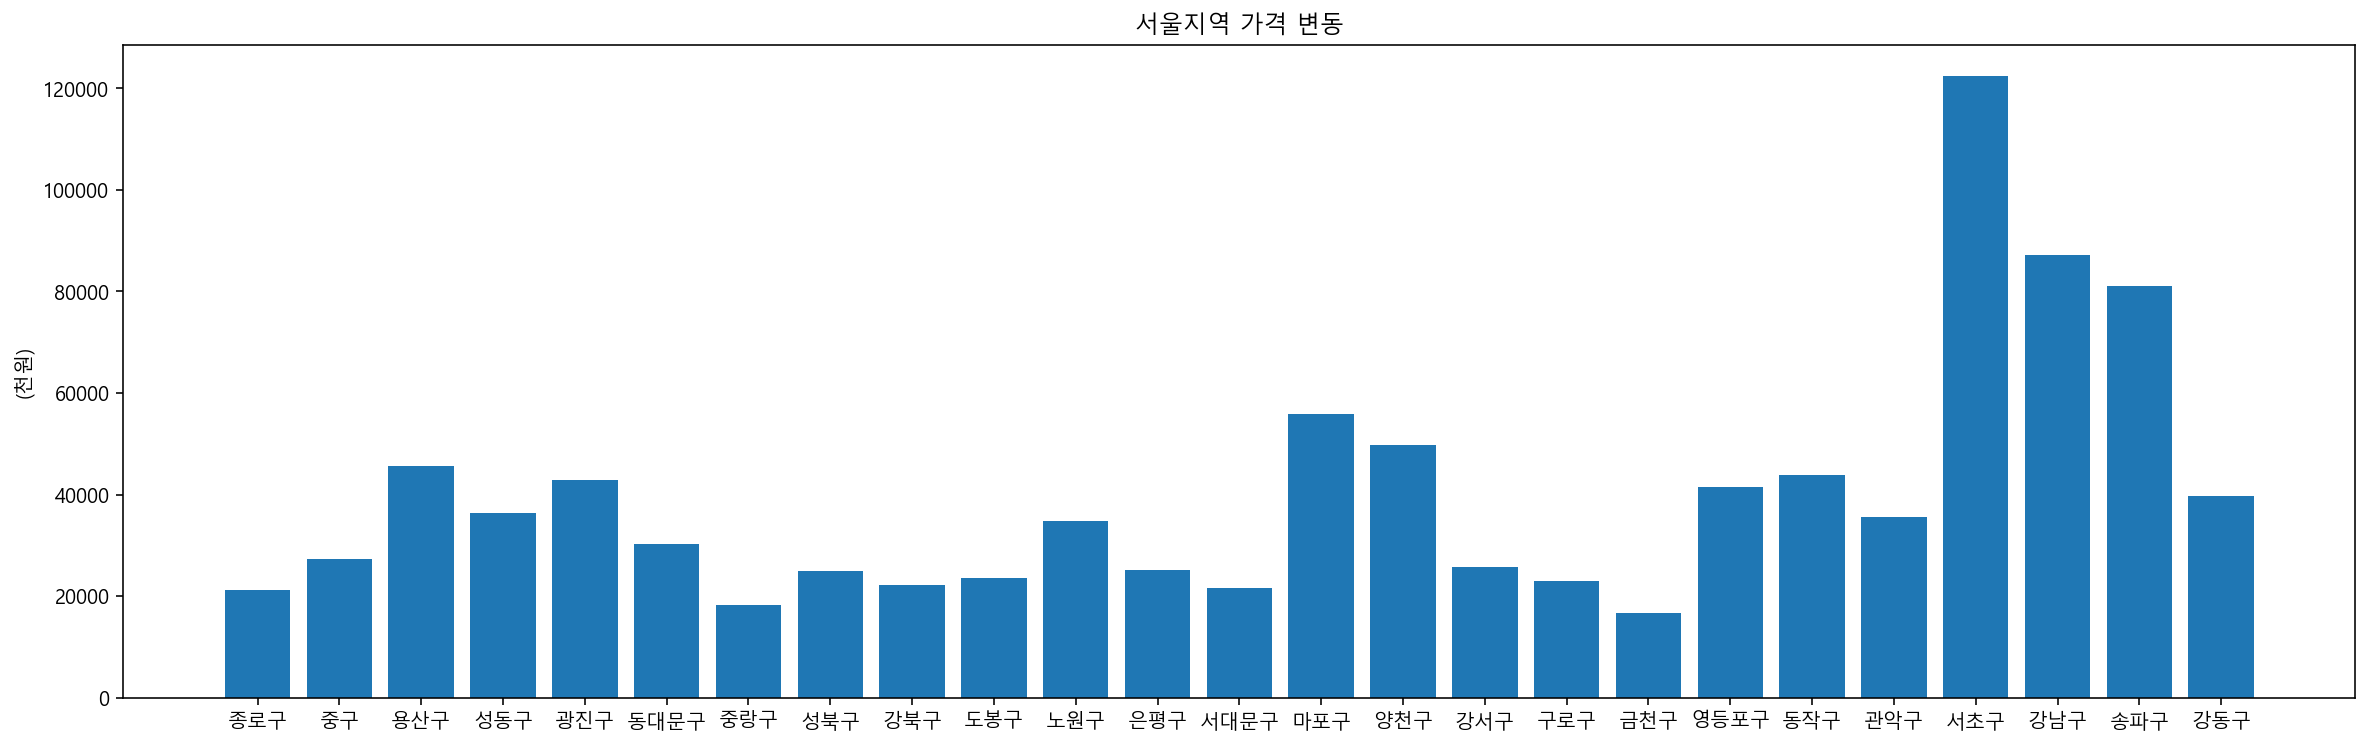

In [46]:
# ㅇㅇ 지역 가격 변동
plt.figure(figsize=(20, 6))
plt.title('서울지역 가격 변동')
plt.bar(apart3['구군'], apart3['증가액'])
plt.ylabel('(천원)')
plt.show()



**3) ㅇㅇ 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

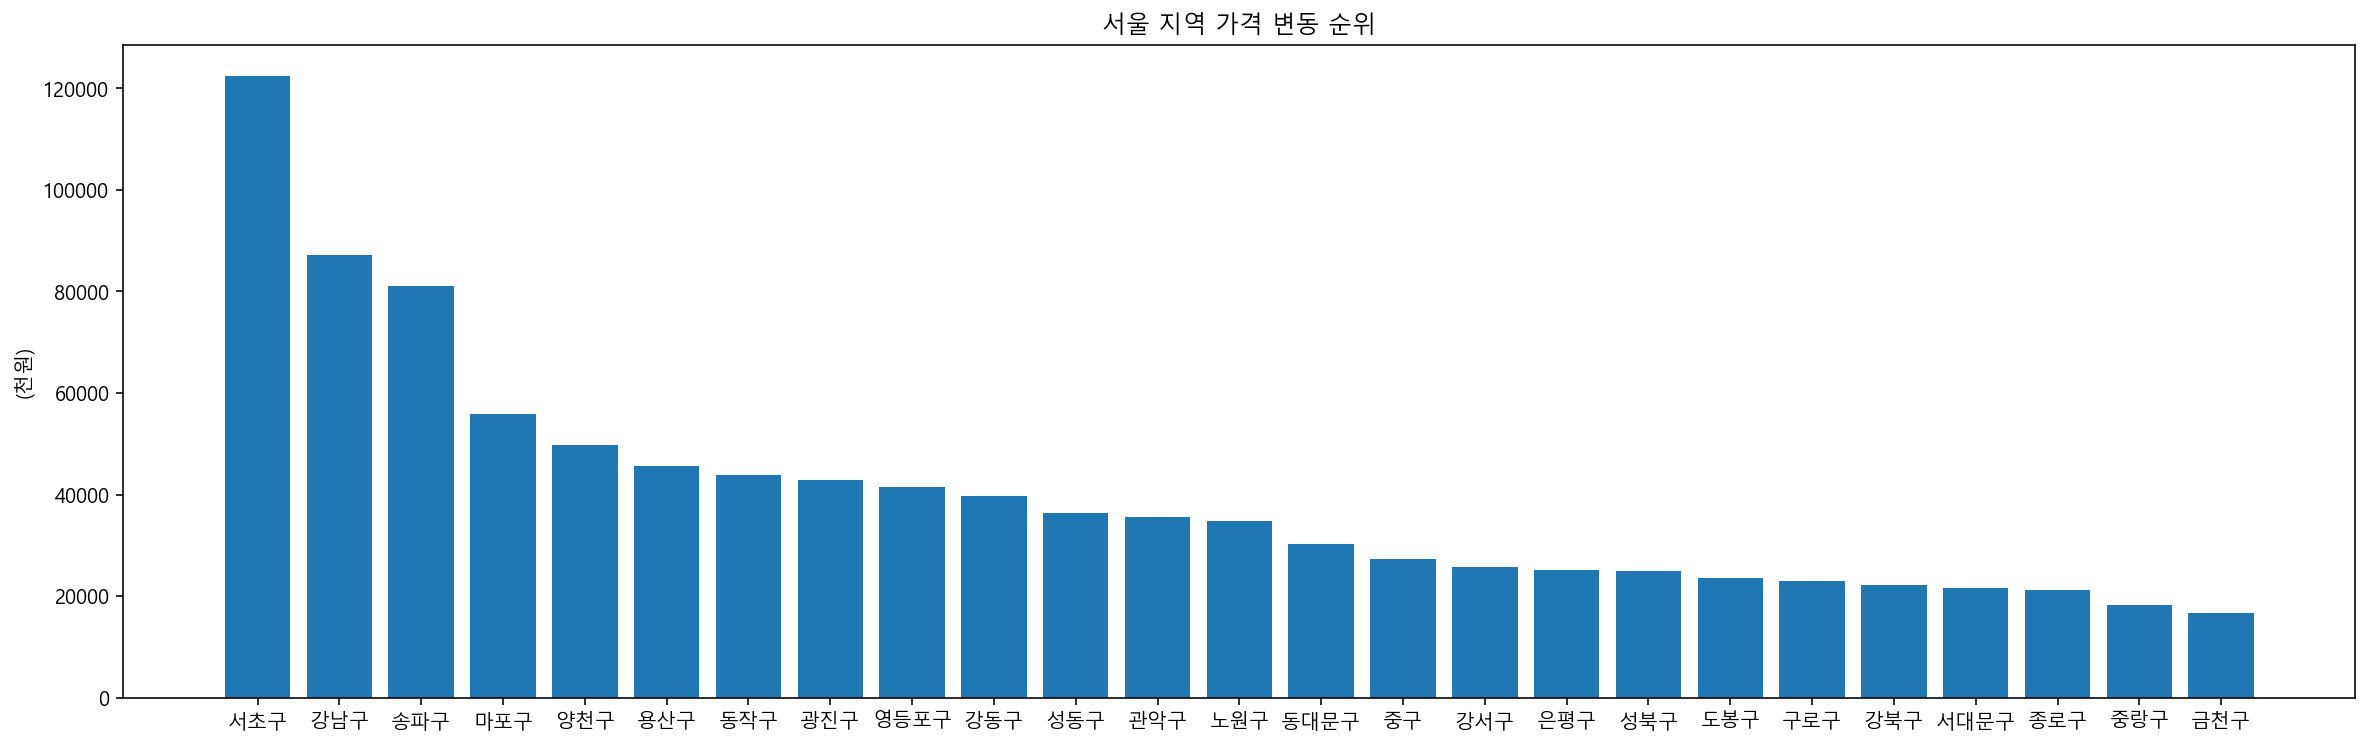

In [47]:
# ㅇㅇ 지역 가격 변동 순위
tmp = apart3.sort_values(by='증가액', ascending=False)

# 시각화
plt.figure(figsize=(20,6))
plt.bar(tmp['구군'], tmp['증가액'])
plt.title('서울 지역 가격 변동 순위')
plt.ylabel('(천원)')
plt.show()





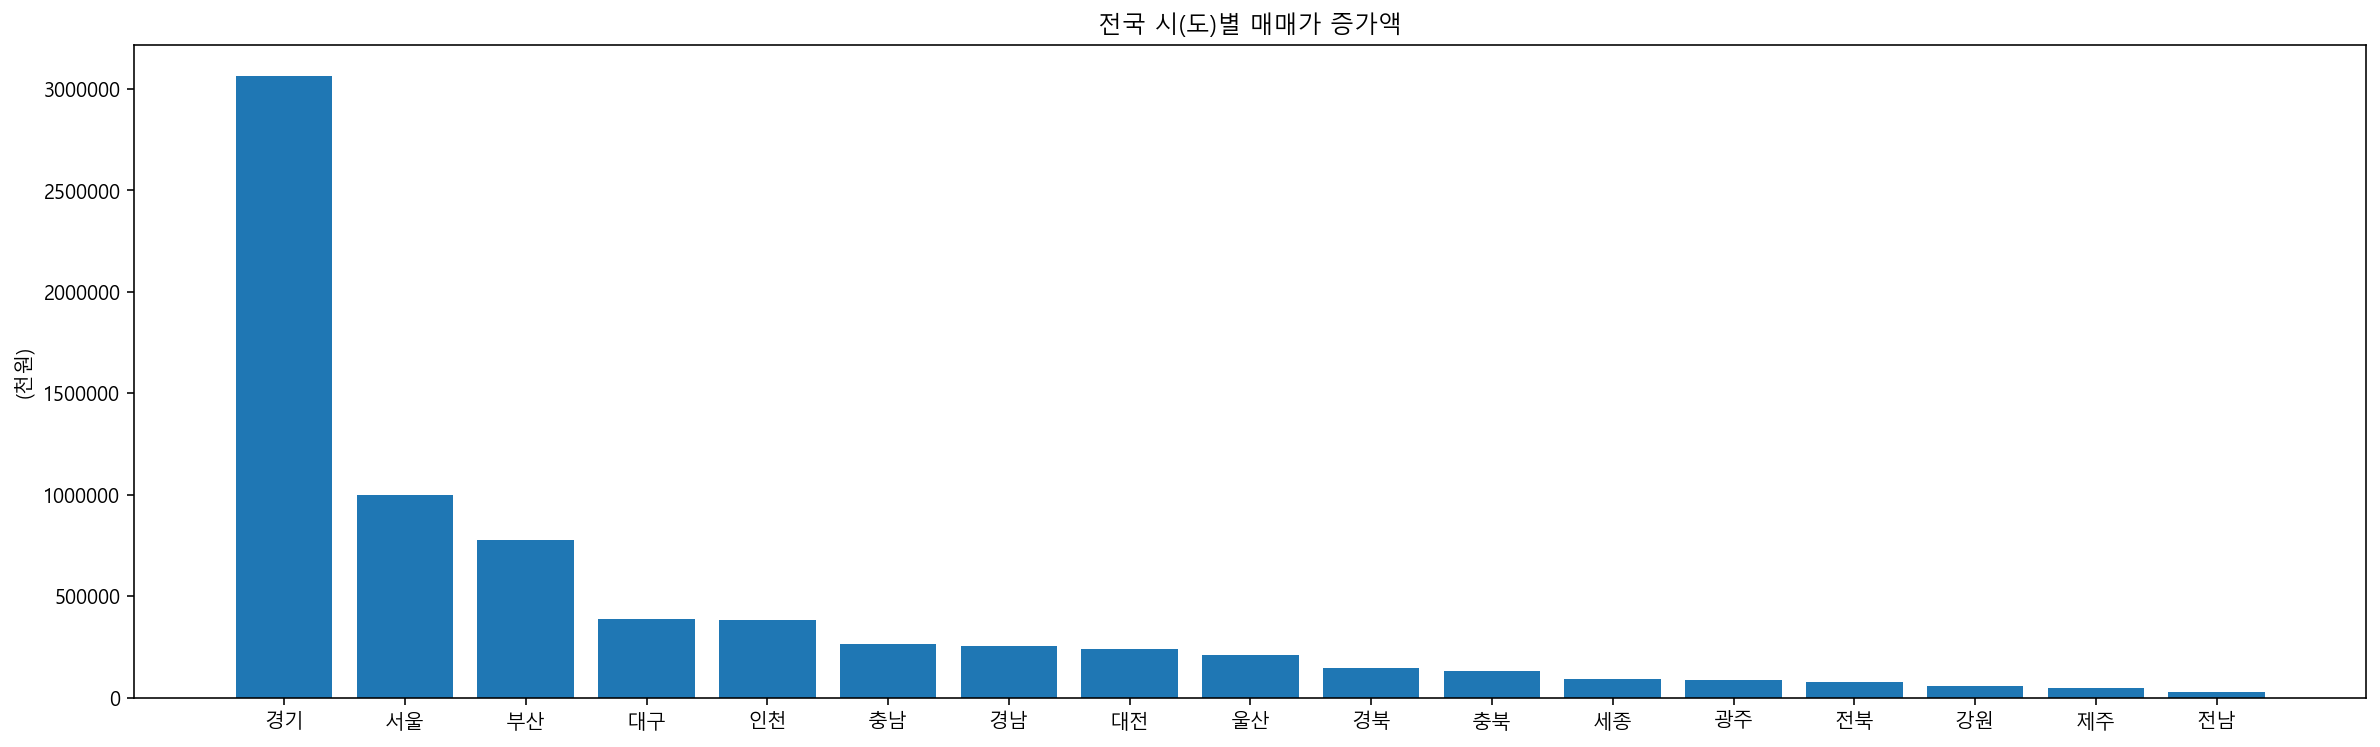

In [57]:
apart4 = apart2.groupby(by='시도', as_index=False)[['증가액']].sum()
tmp = apart4.sort_values(by='증가액', ascending=False)
plt.figure(figsize=(20,6))
plt.ticklabel_format(style = 'plain')
plt.title('전국 시(도)별 매매가 증가액')
plt.bar(tmp['시도'],tmp['증가액'])
plt.ylabel('(천원)')
plt.grid
plt.show()

증가액    4439912
dtype: int64
증가액    2797374
dtype: int64


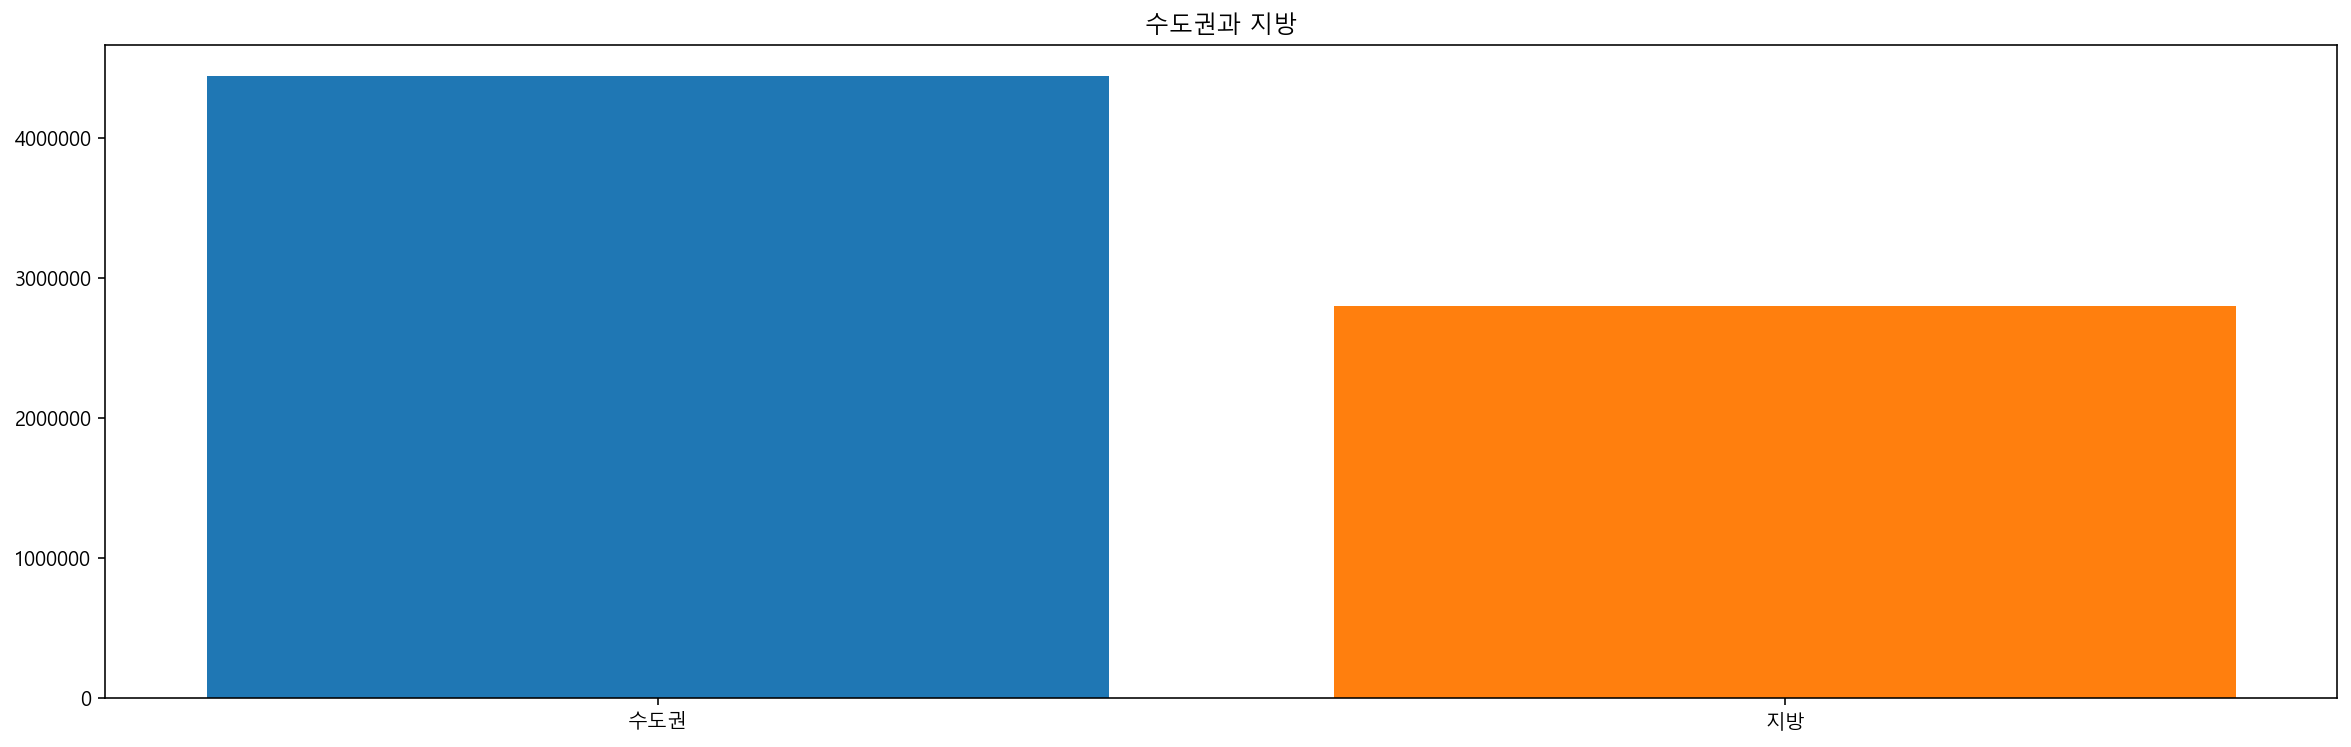

In [103]:
a = apart4.loc[apart4['시도'].isin(['서울','인천','경기'])][['증가액']].sum()
b = apart4['증가액'].sum() - a
print(a)
print(b)
plt.figure(figsize=(20,6))
plt.ticklabel_format(style = 'plain')
plt.title('수도권과 지방')
plt.bar('수도권',a)
plt.bar('지방',b)
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 전국에서는 동안구, 의왕시, 수성구 순으로 집값이 올랐으며 당진시와 사천시는 집값이 하락하였다. 
- 경기지역은 타지역보다 매매가 증가액이 2배이상 높다.
- 지방과 수도권과의 아파트 가격 격차가 늘어나고 있으니 대책이 필요하다.
- 서울 내 증가액 최고 순위 세곳은 흔히 얘기하는 강남3구이다
- 서울 내 서초구는 증가액도 증가율도 최상위권인 것으로 보아 이전에 높은 가격임에도 상당히 올랐음을 알 수 있다
- 서울 내 노원구는 증가액은 중위권이나 증가율이 1위인 것으로 보아 이전 매매가격이 상당히 낮았음을 알 수 있다.
- 같은 서울이지만 강남3구에 집중된 아파트 매매가격의 증가로 다른 지역구와의 격차가 벌어지고 있어 대책이 필요하다

